In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [2]:
df = pd.read_csv("c:/Users/hp/LNU/TruLedger-AI/Datasets/Processed/TrainingSet.csv")
print(df.shape)
df.head()


(1296675, 93)


,is_fraud,txn_time,amt,TXNctg_travel,TXNctg_misc_net,TXNctg_grocery_pos,TXNctg_kids_pets,TXNctg_shopping_net,TXNctg_grocery_net,TXNctg_food_dining,...,dob_50s,dob_60s,dob_70s,dob_80s,dob_90s,dob_00s,avg_txn_amt,stddev_txn_amt,avg_txn_time,avg_merchant_distance
0,0,0,198.39,0,0,1,0,0,0,0,...,0,0,1,0,0,0,94.14,133.03,13.97,77.4
1,0,22,3.99,0,0,0,0,1,0,0,...,0,0,1,0,0,0,94.14,133.03,13.97,77.4
2,0,19,77.88,0,0,0,0,0,0,0,...,0,0,1,0,0,0,94.14,133.03,13.97,77.4
3,0,16,44.58,0,0,0,0,0,0,0,...,0,0,1,0,0,0,94.14,133.03,13.97,77.4
4,0,21,36.23,0,0,0,1,0,0,0,...,0,0,1,0,0,0,94.14,133.03,13.97,77.4


Splitting Features and is_fraud Label

In [3]:
X = df.drop("is_fraud", axis=1)
y = df["is_fraud"]


Scaling Features

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Training the non-fraudulent transactions from the processed Training Set

In [5]:
X_train = X_scaled[y == 0]
X_test = X_scaled
y_test = y


Autoencoder ML Model

In [6]:
input_dim = X_train.shape[1]

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         5,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 92)             │         5,980 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,196 (67.17 KB)

 Trainable params: 17,196 (67.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.8978 - val_loss: 0.9013
Epoch 2/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8908 - val_loss: 0.9011
Epoch 3/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8907 - val_loss: 0.9009
Epoch 4/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8906 - val_loss: 0.9009
Epoch 5/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8906 - val_loss: 0.9009
Epoch 6/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8905 - val_loss: 0.9008
Epoch 7/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8904 - val_loss: 0.9006
Epoch 8/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8890 - val_loss: 0.8970
Epoch 9/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8867 - val_loss: 0.8970
Epoch 10/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8853 - val_loss: 0.8943
Epoch 11/50
4533/4533 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.8843 - val_loss: 0.8943
Epoch 12/50
4533/4533 ━━━━━━━

Evaluating Reconstruction Error

In [7]:
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.square(reconstructions - X_test), axis=1)

# Set threshold (95th percentile)
threshold = np.percentile(mse, 99)
print("Reconstruction error threshold:", threshold)


40522/40522 ━━━━━━━━━━━━━━━━━━━━ 27s 675us/step
Reconstruction error threshold: 3.012373656310015


Classifying Anomalies

In [8]:
y_pred = (mse > threshold).astype(int)

Model Evaluation

[[1277011   12158]
 [   6697     809]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1289169
           1       0.06      0.11      0.08      7506

    accuracy                           0.99   1296675
   macro avg       0.53      0.55      0.54   1296675
weighted avg       0.99      0.99      0.99   1296675



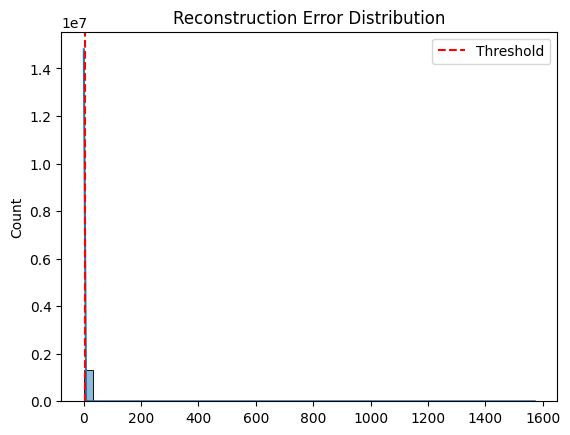

In [9]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.histplot(mse, bins=50, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()


# autoencoder.save("fraud_autoencoder_model.h5")